In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import h5py
import glob 
from scipy import interpolate
import json
import os
import sys
from NuRadioReco.utilities import units
from NuRadioReco.detector import detector
from NuRadioMC.utilities import fluxes
from NuRadioMC.utilities.Veff import get_Veff_Aeff, get_Veff_Aeff_array, get_index, get_Veff_water_equivalent
#from my_Veff import get_Veff_Aeff, get_Veff_Aeff_array, get_index, get_Veff_water_equivalent
from NuRadioMC.examples.Sensitivities import E2_fluxes3 as limits
from Get_hdf5_data import get_attr_data, get_shower_data, get_station_data, get_Veff_data, get_event_data, get_nur_data
from Peak_Finding import count_peak, get_noise, save_data_2_csv, read_column_csv
import numpy as np
import matplotlib.pyplot as plt
from NuRadioReco.utilities import units
import NuRadioReco.detector.detector as detector
import NuRadioReco.modules.io.eventReader
import astropy
from NuRadioReco.framework.parameters import stationParameters as stnp
import pandas as pd

temp_stdout = None
# Disable
def blockPrint():
    global temp_stdout
    temp_stdout = sys.stdout
    sys.stdout = open(os.devnull, 'w')

# Restore
def enablePrint():
    global temp_stdout
    sys.stdout = temp_stdout


PATH = "/home/teikiet/Data/"
##########################################################################
S_ID = [100, 2, 3, 4, 5] #station ID
c_ID = range(0,16) #channel ID
##########################################################################
threshold = 5 #threshold
bin_size = 35 #bin size aka time interval x 0.2ns
sample_size = 1000 #the time interval for peak detection x0.2ns
E = 19 #energy
num =  1e3 #number of particles
detectordescription = "detector/ara2.json" #detector 
##########################################################################
#Nur path:
inputfilename1 = PATH + f"sims_monopoles_ara2_n1.000e03_4_18to21/Nur/1.000e{E}/"
inputfilename2 = PATH + f"sims_neutrinos_ara2_n1.000e03_4_18to21/Nur/sim_1.000e{E}.nur"
##########################################################################
#Hdf5 path:
path1 = PATH + f'sims_monopoles_ara2_n1.000e03_4_18to21/Hdf5/1.000e{E}'
path2 = PATH + f'sims_neutrinos_ara2_n1.000e03_4_18to21/Hdf5/sim_1.000e{E}.hdf5'
get_attr_data(path2)
##########################################################################
#Save data to csv file:
data1 = f'Peak_data/Data_monopoles_ara2_n1.000e03_1e{E}.csv'
data2 = f'Peak_data/Data_neutrinos_ara2_n1.000e03_1e{E}.csv'
##########################################################################
#Find peak and save data:
#save_data_2_csv(data1, inputfilename1, detectordescription, S_ID, c_ID)  
#save_data_2_csv(data2 ,inputfilename2, detectordescription, S_ID, c_ID)  

Attributes of hdf5: ['Emax', 'Emin', 'NuRadioMC_EvtGen_version', 'NuRadioMC_EvtGen_version_hash', 'NuRadioMC_version', 'NuRadioMC_version_hash', 'Tnoise', 'VERSION_MAJOR', 'VERSION_MINOR', 'Vrms', 'area', 'bandwidth', 'config', 'deposited', 'detector', 'dt', 'fiducial_rmax', 'fiducial_rmin', 'fiducial_zmax', 'fiducial_zmin', 'flavors', 'header', 'n_events', 'n_samples', 'phimax', 'phimin', 'rmax', 'rmin', 'start_event_id', 'thetamax', 'thetamin', 'total_number_of_events', 'trigger_names', 'volume', 'zmax', 'zmin']
Keys of hdf5: ['azimuths', 'energies', 'event_group_ids', 'flavors', 'inelasticity', 'interaction_type', 'multiple_triggers', 'n_interaction', 'shower_energies', 'shower_ids', 'shower_realization_Alvarez2009', 'shower_type', 'station_100', 'station_2', 'station_3', 'station_4', 'station_5', 'trigger_times', 'triggered', 'vertex_times', 'weights', 'xx', 'yy', 'zeniths', 'zz']


In [4]:
import os
import plotly.express as px
E = [1e18, 1e19, 1e20, 1e21]
E2 = [18, 19, 20, 21]
#Inintialize:
MM = []
NI = []
BRM = []
EP = []
IE = []
#Loop over energy:
for e in E2:
    event = PATH + f"events_n1.000e03_4_18to21/evt_1.000e{e}.hdf5"
    #get_attr_data(os.path.join(event, "evt_1.000e18.hdf5.part0330"))
    xx, yy, zz, flavors = get_event_data(event)
    #fig = px.scatter_3d(x=xx, y=yy, z=zz, color=flavors)
    #fig.show()
    #counting interaction:
    mm = 0
    nuclr_int = 0
    brems = 0
    epair = 0
    ionized_e = 0
    for f in flavors:
        if f == 41:
            mm += 1
        elif f == 81:
            brems += 1
        elif f == 85:
            nuclr_int += 1
        elif f == 83:
            epair += 1
        elif f == 82:
            ionized_e += 1
        else:
            print(f)
    MM.append(mm)
    NI.append(nuclr_int)
    BRM.append(brems)
    EP.append(epair)
    IE.append(ionized_e)


-16
16
-12
-12
12
12
14
-16
-12
-16
12
12
-12
-12
14
-12
12
-16
-16
14
-14
-12
-12
-12
-12
12
12
12
12
16
14
-16
-16
-12
-12
-12
-12
-12
-12
-12
16
-14
-16
-14
12
12
14
-12
12
12
16
-16
14
12
-12
-12
-16
-12
12
12
-16
16
12
16
16
14
12
12
-12
-12
12
12
16
-14
12
12
-12
14
14
-12
-12
-16
16
-12
-16
12
12
-14
-16
14
-12
-12
16
-12
-12
16
-12
-12
14
14
14
14
-12
-12
14
-16
16
12
12
-16
-16
-12
-12
16
-14
-16
-12
-14
-16
-12
-12
12
16
12
-16
-16
12
12
16
12
12
14
-12
-12
-14
-14
-14
-16
12
12
14
16
14
14
-14
-16
12
12
-14
16
-12
-12
14
-14
-14
14
12
12
12
12
14
-12
-12
-12
-14
14
-12
-12
-16
12
12
12
-12
-12
14
-14
-12
-12
-14
-16
-14
-16
16
16
-12
-12
12
12
12
16
-14
12
12
-16
14
16
14
-14
-12
-12
-12
14
14
-14
-14
12
12
-16
12
12
12
14
-14
-16
-16
12
12
16
-12
-16
-12
-12
-14
14
14
12
12
-16
-14
16
-14
12
12
12
12
-14
16
14
16
14
-16
12
12
16
12
12
-14
16
-16
12
12
14
-12
-12
16
12
12
14
-14
14
12
12
16
-12
-12
14
16
12
12
16
14
-12
-12
14
16
16
-16
12
12
12
-12
-12
12
12
14
-12
16
14
-1

In [3]:
print(MM)
print(NI)
print(BRM)
print(EP)
print(IE)


[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]


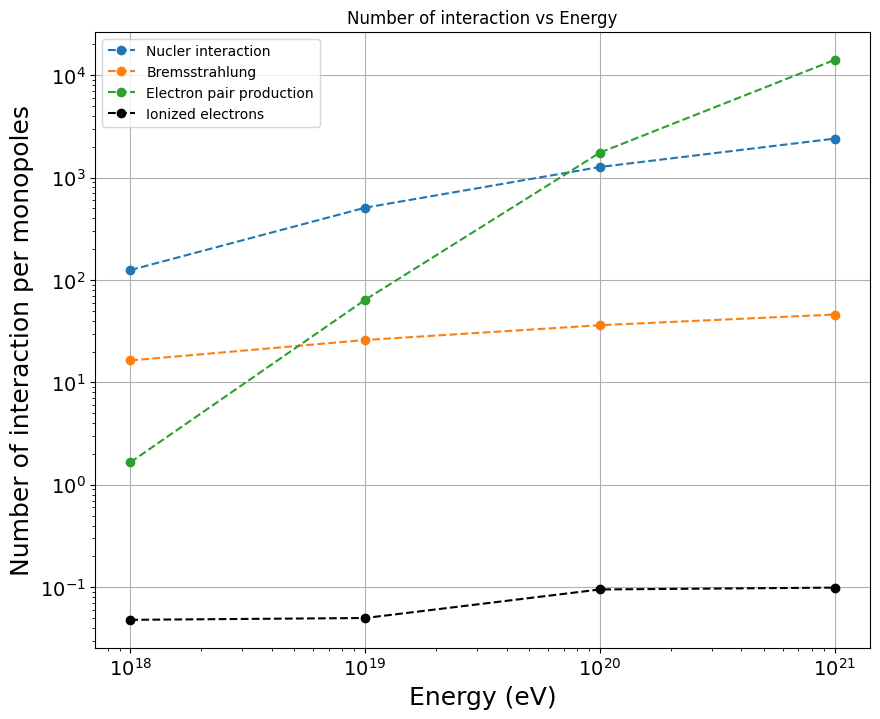

In [6]:
#Saved data:
import os
import plotly.express as px
E = [1e18, 1e19, 1e20, 1e21]
NI = np.array([124946, 508128, 1269006, 2401006])/1000
BRM = np.array([16366, 25921, 36158, 45986])/1000
EP = np.array([1656, 64042, 1753329, 14117547])/1000
IE = np.array([48, 50, 95, 99])/1000
####################################
plt.figure(figsize=(10, 8))
plt.plot(E, NI, "o--", label="Nucler interaction")
plt.plot(E, BRM, "o--", label="Bremsstrahlung")
plt.plot(E, EP, "o--", label="Electron pair production")
plt.plot(E, IE, "o--", color = "black", label="Ionized electrons")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xlabel("Energy (eV)")
plt.ylabel("Number of interaction per monopoles")
plt.title("Number of interaction vs Energy")
plt.grid()
plt.show()


In [4]:
#######################################################
#Counting em shower and hadronic shower:
E2 = [18, 19, 20, 21]

for e in E2:
    hdf5 = PATH + f"sims_neutrinos_ara2_n1.000e03_4_18to21/Hdf5/sim_1.000e{e}.hdf5"
    #get_attr_data(os.path.join(event, "evt_1.000e18.hdf5.part0330"))
    shower_id, shower_energies, xx, yy, zz, shower_type = get_shower_data(hdf5)
    em = 0
    had = 0
    for i_s in shower_type:
        i_s = str(i_s)
        if i_s == "b'em'":
            em += 1
        elif i_s == "b'had'":
            had += 1
        else:
            print(i_s, type(i_s))
    print("Energy: 1e", e)
    print("Number of em shower:", em)
    print("Number of hadronic shower:", had)
    print("Total number of shower:", em + had)
    print("Percentage of em shower:", em/(em + had))

Energy: 1e 18
Number of em shower: 5
Number of hadronic shower: 11
Total number of shower: 16
Percentage of em shower: 0.3125
Energy: 1e 19
Number of em shower: 7
Number of hadronic shower: 25
Total number of shower: 32
Percentage of em shower: 0.21875
Energy: 1e 20
Number of em shower: 27
Number of hadronic shower: 72
Total number of shower: 99
Percentage of em shower: 0.2727272727272727
Energy: 1e 21
Number of em shower: 32
Number of hadronic shower: 132
Total number of shower: 164
Percentage of em shower: 0.1951219512195122


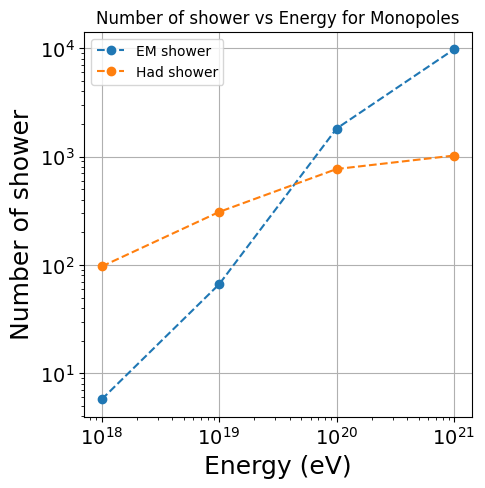

In [14]:
#Monopoles:
E = [1e18, 1e19, 1e20, 1e21]
MM = np.array([4, 8, 14, 15])
Neu = np.array([11, 27, 96, 207])
num_em = np.array([23, 530, 25346, 146214])/MM
num_had = np.array([387, 2464, 10733, 15304])/MM
num_total = [410, 2994, 36079, 161518]
plt.figure(figsize=(5, 5))
plt.plot(E, num_em, "o--", label="EM shower")
plt.plot(E, num_had, "o--", label="Had shower")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xlabel("Energy (eV)")
plt.ylabel("Number of shower")
plt.title("Number of shower vs Energy for Monopoles")
plt.grid()
plt.show()


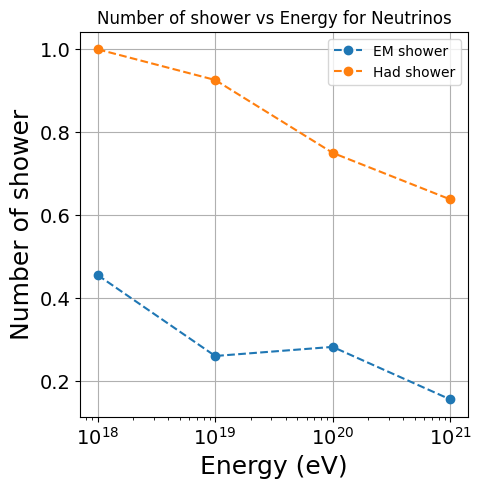

In [16]:
#Neutrinos:
num_em = np.array([5, 7, 27, 32])/Neu
num_had = np.array([11, 25, 72, 132])/Neu
num_total = [16, 32, 99, 164]
plt.figure(figsize=(5, 5))
plt.plot(E, num_em, "o--", label="EM shower")
plt.plot(E, num_had, "o--", label="Had shower")
plt.xscale("log")
#plt.yscale("log")
plt.legend()
plt.xlabel("Energy (eV)")
plt.ylabel("Number of shower")
plt.title("Number of shower vs Energy for Neutrinos")
plt.grid()
plt.show()


In [3]:
blockPrint()
Veff2, Veff_error2, energies2 = get_Veff_data(path2)
Veff1, Veff_error1, energies1 = get_Veff_data(path1)
enablePrint()

INFO:Veff:first file with triggernames /home/teikiet/Data/sims_neutrinos_ara2_n1.000e03_4_18to21/Hdf5/sim_1.000e19.hdf5: ['hilo_2of4_5_sigma' 'simple_10_sigma']
INFO:Veff:Trigger names:  ['hilo_2of4_5_sigma' 'simple_10_sigma']
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  Non

/tmp/ipykernel_31703/2075676871.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


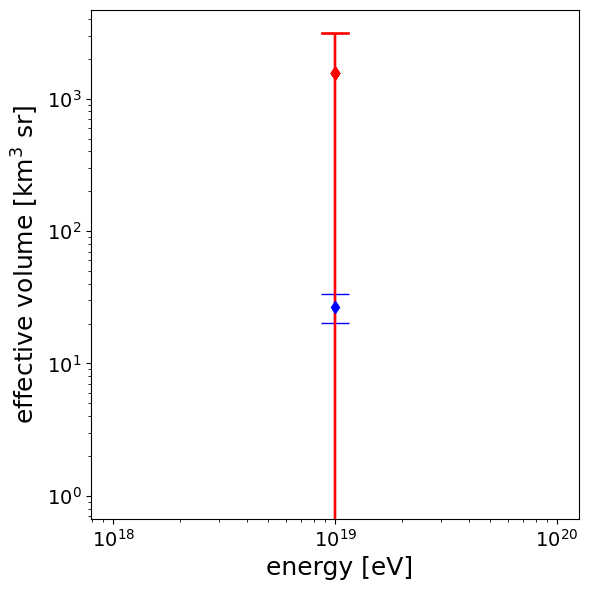

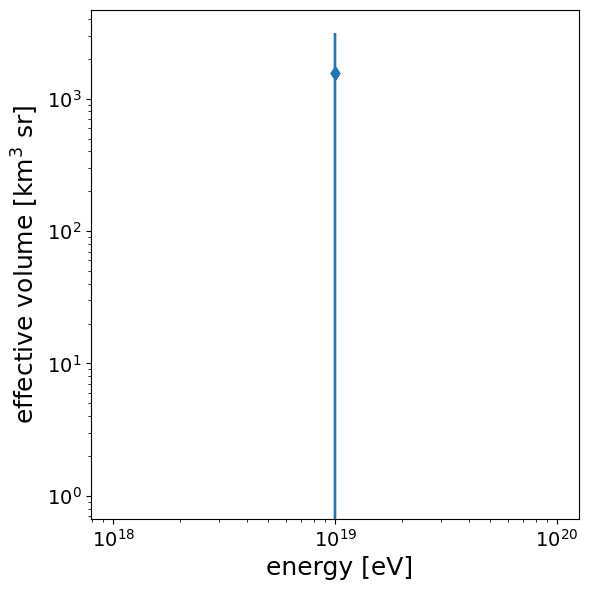

In [4]:
    # plot effective volume
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.errorbar(energies1 / units.eV, Veff1 / units.km ** 3 / units.sr,
            yerr=Veff_error1 / units.km ** 3 / units.sr, fmt='d', capsize = 10, color = "red")

ax.errorbar(energies2 / units.eV, Veff2 / units.km ** 3 / units.sr,
            yerr=Veff_error2 / units.km ** 3 / units.sr,  fmt='d', capsize = 10, color = "blue")

ax.semilogx(True)
ax.semilogy(True)
ax.set_xlabel(" energy [eV]")
ax.set_ylabel("effective volume [km$^3$ sr]")
fig.tight_layout()
#fig.show()

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.errorbar(energies1 / units.eV, Veff1 / units.km ** 3 / units.sr,
            yerr=Veff_error1 / units.km ** 3 / units.sr, fmt='d')
ax.semilogx(True)
ax.semilogy(True)
ax.set_xlabel(" energy [eV]")
ax.set_ylabel("effective volume [km$^3$ sr]")
fig.tight_layout()
fig.show()

In [7]:
a = [0, 1, 2]
b= [3, 4, 5, 0, 1, 2]

if any(item in a for item in b):
    print(item)

NameError: name 'item' is not defined